Claudio Sartori 

Elaboration from the example given in [Sebastian Raschka](http://sebastianraschka.com), 2015

https://github.com/rasbt/python-machine-learning-book

# Machine Learning - Lab
## Working with Unlabeled Data – Clustering Analysis
### Use __DBSCAN__

### Overview
In this example we will use an _artificial_ data set  
 1. load the data  
 2. check the shape and plot the content  
 3. observe the plot and decide which are the most interesting columns, to use in the plots of the clusters  
    - make a 2d plot of the two most promising columns 
    - remove from the dataset the columns which seem to be non interesting 
 4. initialize and `fit_predict` an estimator for `DBSCAN`, using the default parameters, then print the results  
    - print the estimator to check the parameter values  
    - the labels are the unique values of the predicted values  
    - print if there is noise  
        - if there is noise the first cluster label will be `-1`  
    - print the number of clusters (noise excluded)  
        - the other clusters are labeled starting from `0`  
    - for each cluster (noise excluded) compute the __centroid__  
    - plot the data with the centroids and the colors representing clusters  
        - use the `plot_clusters` function provided  
 5. find the best parameters using `ParameterGrid`  
    - prepare a dictionary with the parameters lists  
    - generate the list of the parameter combinations with `ParameterGrid`  
    - for each combination of parameters  
        - initialize the DBSCAN estimator  
        - `fit_predict`  
        - extract the labels and the number of clusters excluding the _noise_  
        - compute the silhouette score and the number of unclustered objects (noise)  
        - filter and print the parameters and the results  
            - print if the silhouette score is above a threshold and the percentage of unclustered is below a threshold  
 6. observe visually the most promising combination of parameters  
    - fit and predict the estimator  
    - plot the clusters  
    - plot the silhouette scores for each sample using the function `plot_silhouette`  
        

In [ ]:
from IPython.display import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
import io

%matplotlib inline

rnd_state = 42 # This variable will be used in all the procedure calls allowing a random_state parameter
               # in this way the running can be perfectly reproduced
               # just change this value for a different experiment

In [ ]:
# the .py files with the functions provided must be in the same directory of the .ipynb file
uploaded = files.upload() #plot_clusters.py
uploaded = files.upload() #plot_silhouette.py
from plot_clusters import plot_clusters      # python script provided separately
from plot_silhouette import plot_silhouette  # python script provided separately

Saving plot_clusters.py to plot_clusters.py


Saving plot_silhouette.py to plot_silhouette.py


In [ ]:
help(plot_clusters)

Help on function plot_clusters in module plot_clusters:

plot_clusters(X, y, dim, points=None, labels_prefix='cluster', points_name='centroids', colors=<matplotlib.colors.ListedColormap object at 0x7fb27ef106d0>, points_color=(0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0))
    Plot a two dimensional projection of an array of labelled points
    X:      array with at least two columns
    y:      vector of labels, length as number of rows in X
    dim:    the two columns to project, inside range of X columns, e.g. (0,1)
    points: additional points to plot as 'stars'
    labels_prefix: prefix to the labels for the legend ['cluster']
    points_name:   legend name for the additional points ['centroids']
    colors: a color map
    points_color: the color for the points



In [ ]:
help(plot_silhouette)

Help on function plot_silhouette in module plot_silhouette:

plot_silhouette(silhouette_vals, y, colors=<matplotlib.colors.ListedColormap object at 0x7fb27ef106d0>)
    Plotting silhouette scores for the individual samples of a labelled data set.
    The scores will be grouped according to labels and sorted in descending order.
    The bars are proportional to the score and the color is determined by the label.
    
    silhouette_vals: the silhouette values of the samples
    y:               the labels of the samples



### 1. Load the data

In [ ]:
# data_file = 'ex1_4dim_data.csv'
# data_file = 'ex1_4dim_mod_data.csv'
# data_file = 'ex1_data.csv'

uploaded = files.upload()
data_file = 'ex2_4d_moon.csv'
delimiter = ','
df = pd.read_csv(data_file, sep=delimiter, names=['x1','x2','x3','x4'])
df

Saving ex2_4d_moon.csv to ex2_4d_moon.csv


,x1,x2,x3,x4
0,0.981321,0.311046,-0.499666,0.364141
1,1.844094,0.849923,0.072311,0.769071
2,-0.060090,0.976297,1.048577,0.583983
3,-0.174089,0.224419,1.099558,0.160406
4,-0.464776,0.128991,0.877356,0.200315
...,...,...,...,...
1495,1.023138,0.061628,-0.517279,0.755912
1496,1.819711,0.805867,-0.081774,0.448275
1497,0.090123,0.546564,0.020222,0.357382
1498,1.835271,0.884027,0.332585,0.845576


### 2. Inspect

In [ ]:
df.shape

(1500, 4)

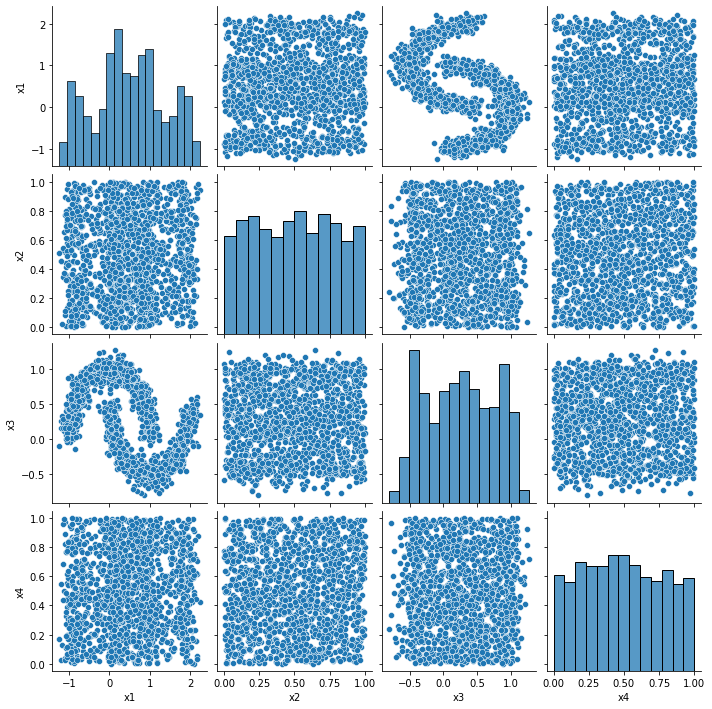

In [ ]:
sns.pairplot(df)

### 3. Observing the pairplots
In this simple example you can easily see which are the two most interesting columns.

All the plots will focus on those columns.

Plot them using plt.scatter: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


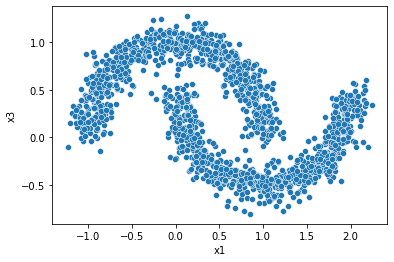

In [ ]:
sns.scatterplot(df['x1'],df['x3'])

### 4. Initialize, fit_predict and plot the clusters

Initialize the model using the default hyperparameters. 

Write some code to understand how many clusters have been defined by DBSCAN.

Then verify that using the plot_clusters function.


In [ ]:
def remove_cluster_colum(df):
  try:
    return df.drop('clusters',1)
  except:
    return df

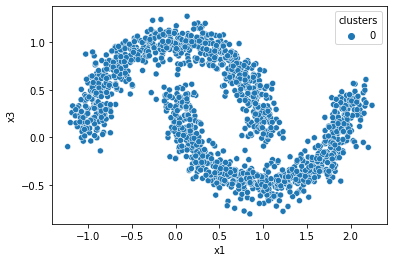

In [ ]:
df = remove_cluster_colum(df)

cluster_labels = DBSCAN().fit(df)
df["clusters"] = cluster_labels.labels_
sns.scatterplot(x="x1", y="x3", hue="clusters", data=df)

In [ ]:
x1 = df['x1'].to_numpy()
x3 = df['x3'].to_numpy()
clusters = df['clusters'].to_numpy()

X = []
y = []

for i in range(0,len(x1)):
  X.append([x1[i],x3[i]])
  y.append(clusters[i])

X = np.array(X)

clusters = set()
for c in y:
    clusters.add(c)

print('We have ' + str(len(clusters)) + ' cluster')

We have 1 cluster


In [ ]:
X.shape

(1500, 2)

In [ ]:
import statistics

In [ ]:
# point x cluster separation to get the centroid for each cluster
# cluster 0 x1 and x3, more if more clusters
c0_x1 = []
c0_x3 = []

for i in range(0,len(x1)):
  if(y[i] == 0): #we have only cluster 0, more if more clusters
    c0_x1.append(x1[i])
    c0_x3.append(x3[i])

cluster_centroids = np.array([[statistics.mean(c0_x1),statistics.mean(c0_x3)]]) #,[statistics.mean(cN_x1), statistics.mean(cN_x3)], ...
cluster_centroids

array([[0.50200094, 0.25370895]])

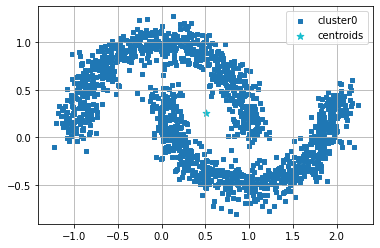

In [ ]:
plot_clusters(X, y, (0,1), points=cluster_centroids)

### 5. Find the best parameters using `ParameterGrid`

PrameterGrid outputs a list of all possible combinations of the parameter values it receives as input.

You must write some code to fit_predict the model for each combination and print the results when the conditions indicated by sil_thr and unc_thr are met.

In [ ]:
search_space = {'eps': list(np.arange(0.05, 1, 0.05)), 'min_samples': list(range(1,10,1))}
params = list(ParameterGrid(search_space))
sil_thr = 0  # visualize results only for combinations with silhouette above the threshold
unc_thr = 33 # visualize results only for combinations with unclustered% below the threshold

In [ ]:
df = remove_cluster_colum(df)

params_clusters = []
params_silhouette = []
params_values = []
index = []

i = 0
for p in params:
  try:
    cluster_labels = DBSCAN(eps=p['eps'], min_samples=p['min_samples']).fit(X) #df
    params_clusters.append(cluster_labels.labels_)
    params_silhouette.append(silhouette_score(X, cluster_labels.labels_)) #df #problematico

    params_values.append([p['eps'], p['min_samples']])
    index.append(i)
    i += 1
  except:
    ;

In [ ]:
for c in range(0,len(params_values)):
  if(params_silhouette[c] >= 0):
    print('index ' + str(index[c]) + '   eps ' + str('%.2f' % round(params_values[c][0],2)) + '   min_samples ' + str(params_values[c][1]) + '   n_clusters ' + str(len(np.unique(params_clusters[c]))) + '   silhouette ' + str(str('%.2f' % round(params_silhouette[c],2)))) #silhouette

    #df = remove_cluster_colum(df)
    #df['clusters'] = params_clusters[c]
    #print(sns.scatterplot(x="x1", y="x3", hue="clusters", data=df))

index 11   eps 0.10   min_samples 3   n_clusters 4   silhouette 0.06
index 12   eps 0.10   min_samples 4   n_clusters 3   silhouette 0.24
index 13   eps 0.10   min_samples 5   n_clusters 3   silhouette 0.23
index 14   eps 0.10   min_samples 6   n_clusters 3   silhouette 0.23
index 15   eps 0.10   min_samples 7   n_clusters 3   silhouette 0.23
index 16   eps 0.10   min_samples 8   n_clusters 3   silhouette 0.22
index 17   eps 0.10   min_samples 9   n_clusters 3   silhouette 0.23
index 18   eps 0.15   min_samples 1   n_clusters 2   silhouette 0.25
index 19   eps 0.15   min_samples 2   n_clusters 2   silhouette 0.25
index 20   eps 0.15   min_samples 3   n_clusters 2   silhouette 0.25
index 21   eps 0.15   min_samples 4   n_clusters 2   silhouette 0.25
index 22   eps 0.15   min_samples 5   n_clusters 2   silhouette 0.25
index 23   eps 0.15   min_samples 6   n_clusters 2   silhouette 0.15
index 24   eps 0.15   min_samples 7   n_clusters 2   silhouette 0.15
index 25   eps 0.15   min_samples 

In [ ]:
# to fill

        eps	min_samples	 n_clusters	 silhouette	    unclust%
       0.05	          1	       1490	       0.01	       0.00%
       0.10	          1	       1297	       0.09	       0.00%
       0.15	          1	        698	       0.07	       0.00%
       0.15	          2	        253	       0.25	      29.67%
       0.25	          2	          2	       0.14	       1.27%
       0.25	          7	          2	       0.28	       3.27%
       0.25	          8	          2	       0.28	       5.80%
       0.25	          9	          2	       0.29	       8.47%


In [ ]:
#20 --> eps 0.15   min_samples 3   n_clusters 2   silhouette 0.25
#26 --> eps 0.15   min_samples 9   n_clusters 3   silhouette 0.27

In [ ]:
df = remove_cluster_colum(df)

#26 --> eps 0.15   min_samples 9   n_clusters 3   silhouette 0.27
df['clusters'] = params_clusters[26]
print(len(np.unique(params_clusters[26])))

3


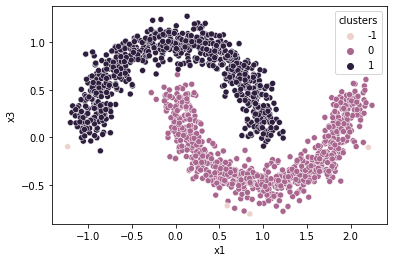

In [ ]:
sns.scatterplot(x="x1", y="x3", hue="clusters", data=df)

### 6. Observe  
- Observe visually the most promising combination of parameters.  
- Plot the clusters with the centers  
- Plot the silhouette indexs for all the clustered samples  

In [ ]:
print('index ' + str(index[26]) + '   eps ' + str('%.2f' % round(params_values[26][0],2)) + '   min_samples ' + str(params_values[26][1]) + '   n_clusters ' + str(len(np.unique(params_clusters[26]))) + '   silhouette ' + str(str('%.2f' % round(params_silhouette[26],2)))) #silhouette

index 26   eps 0.15   min_samples 9   n_clusters 3   silhouette 0.27


In [ ]:
print('The cluster labels are:')
print(np.unique(params_clusters[26])[0])
print(np.unique(params_clusters[26])[1])
print(np.unique(params_clusters[26])[2])

The cluster labels are:
-1
0
1


In [ ]:
# point x cluster separation to get the centroid for each cluster
# cluster 0 x1 and x3, more if more clusters
c0_x1 = []
c0_x3 = []
c1_x1 = []
c1_x3 = []
c2_x1 = []
c2_x3 = []

for i in range(0,len(x1)):
  if(df['clusters'][i] == -1): #we have only cluster 0, more if more clusters
    c0_x1.append(x1[i])
    c0_x3.append(x3[i])
  elif(df['clusters'][i] == 0):
    c1_x1.append(x1[i])
    c1_x3.append(x3[i])
  elif(df['clusters'][i] == 1):
    c2_x1.append(x1[i])
    c2_x3.append(x3[i])

cluster_centroids = np.array([[statistics.mean(c0_x1),statistics.mean(c0_x3)],[statistics.mean(c1_x1), statistics.mean(c1_x3)],[statistics.mean(c2_x1), statistics.mean(c2_x3)]]) #,[statistics.mean(cN_x1), statistics.mean(cN_x3)], ...
cluster_centroids

array([[ 0.60145696, -0.43388095],
       [ 1.00250835, -0.13783519],
       [ 0.00496254,  0.64578716]])

In [ ]:
x1 = df['x1'].to_numpy()
x3 = df['x3'].to_numpy()
clusters = df['clusters'].to_numpy()

X = []
y = []

for i in range(0,len(x1)):
  X.append([x1[i],x3[i]])
  y.append(clusters[i])

X = np.array(X)

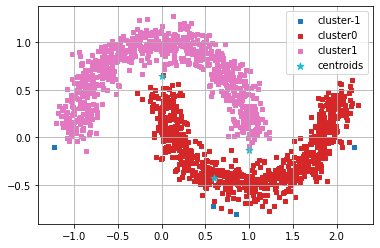

In [ ]:
plot_clusters(X, y, (0,1), points=cluster_centroids)

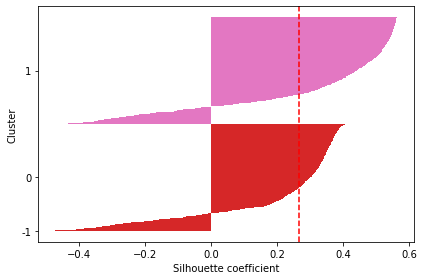

In [ ]:
silhouette_values = silhouette_samples(X, df['clusters'].to_numpy())
plot_silhouette(silhouette_values, y)